<div>
  <img style="float: left;"  width="140" src=" 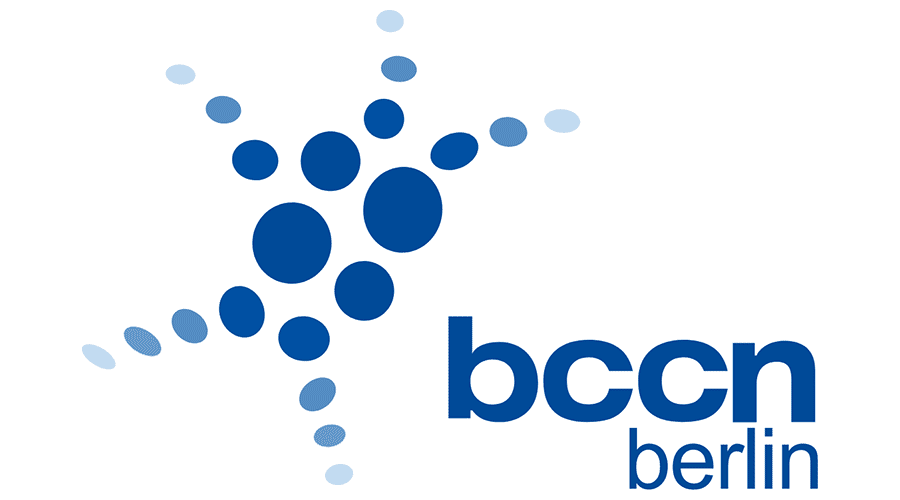">
</div>
 
<h1 id="course-title-heading">
    <div style="text-align: right">
        Models of Higher Brain Functions
        <br>Computer Course
        <br>
    </div>
</h1>
    
---
<div style="text-align: left; float: left">
    Lecturer: Prof. Dr. Henning Sprekeler
</div>

<div style="text-align: right">
    Assistant: Denis Alevi
    <br>(denis.alevi@bccn-berlin.de)
</div>



## General exercise instructions
These exercises should be completed entirely in this Jupyter Notebook (comprising source code, discussion and interpretation). Submission should be done through the Moodle interface and should consist only of this notebook (a single `.ipynb`). This Jupyter Notebook was provided inside a `.zip` file, alongside additional files. Do not change the relative paths of these files when working on the assignment (meaning that e.g. `./helper.py` should always be in the same directory as this notebook).

Submission deadline is the start of the next lectue (**10:15 am on Fridays**).

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Some of the exercises will be automatically graded. Make sure that you:
1. Fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE"
2. Remove all `raise NotImplementedError` lines once you inserted your solution
3. Don't use variable names starting with underscore (e.g. `_myvar`) in your code, which could interfere with the automatic grading system.

Before you start, please fill in below your names and the name of your group as shown on Moodle. Example:
```
NAMES = ["Martina Musterfrau", "John Smith"]
GROUP = "A"
```

In [1]:
NAMES = ["Bramantyo Supriyatno", "Poulami Ghosh"]
GROUP = "E"

In [2]:
# These are a few tests to make sure that your installed Python software is not too old
import sys
assert sys.version_info.major >= 3, "Your Python version is too old, please update it."

import IPython
assert IPython.version_info[0] >= 3, "Your IPython version is too old, please update it."

---

# Week 5: Decision Making I

In [3]:
# Necessary imports for this exercise, you can't modify these
import numpy as np
import matplotlib.pyplot as plt

# Import functions defined in the ./helpers.py file
from helpers import assert_var_defined

In [4]:
# You can add your additional package imports here
from helpers import euler_maruyama
import itertools
# Create plots inline in the Jupyter notebook
%matplotlib inline

## Exercise 1 : Extended drift-diffusion model

In this exercise we will explore the reaction time distribution of the drift diffusion model for perceptual decision making.

### 1.1 Implement a simple form of the drift diffusion model (2 points)

Use the Euler-Maruyama method to implement the stochastic differential equation

$$
dX = \mu dt + \sigma dW
$$

which is a simple form of the drift diffusion model. Start with X = 0. Choose $\sigma$ = 0.5, $\mu$ = 0.2. 
Run five simulations of 10 seconds length with $\Delta t$ = 0.01s and plot the results. You can use your `euler_maruyama` implementation from the last exercise sheet or use the version provided in `helpers.py`.

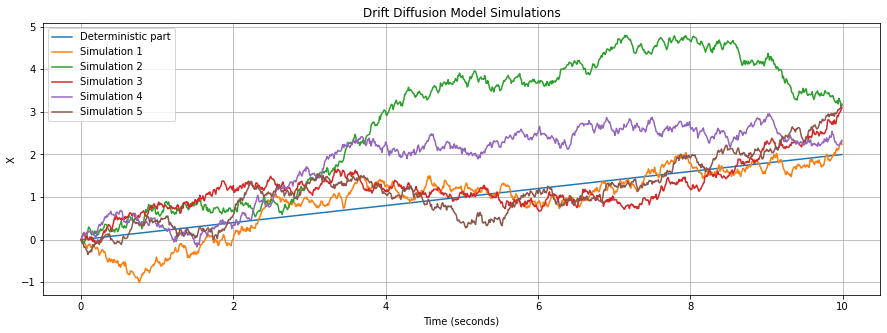

In [5]:
# YOUR CODE HERE
ffunc = lambda x, t, mu, **kwargs : mu
gfunc = lambda x, t, sigma, **kwargs : sigma

del_t = 1e-2
x0 = [0]
t = np.arange(0, 10, del_t)
mu = 0.2

plt.figure(figsize=(15,5))

deterministic_part = ffunc(x0, t, mu)*t
plt.plot(t, deterministic_part, label='Deterministic part')

for i in range(5) :
    res = euler_maruyama(ffunc, gfunc, x0, t,  {'mu':mu}, {'sigma': 0.5})
    
    plt.plot(t, res, label=f"Simulation {i+1}")
    plt.title('Drift Diffusion Model Simulations')
    plt.ylabel('X')
    plt.xlabel('Time (seconds)')
    plt.grid()
    plt.legend()


### 1.2 Simulate decision making with the drift diffusion model
We will use this drift diffusion model as a model for decision making, for which we will define decision boundaries $\pm a$, at which decisions are made.

#### 1.2 a) Implement different decision boundaries (4 points)

- For the drift diffusion model from exercise 1.1, plot the percentage of "up" ($X=+a$) responses as a function of the drift $\mu$ by simulating 200 trials for $a$ = 1 and the following $\mu$ values: −0.1, 0, 0.1, 0.2, 0.5.
- Resimulate trials in which no decision boundary is reached during the simulation.
- Double and halve the value of $a$ and plot the resulting percentage of "up" responses into the same figure. You should have 3 lines, one for each $a$-value.

In [6]:
def check_for_boundary(x_list, up_count, boundary):
    for x in x_list:
        if x >= boundary:
            up_count += 1
            return up_count, True
        if x <= -boundary:
            return up_count, True
    return up_count, False

In [7]:
def get_x_up_percetage_for_each_mu(ffunc, gfunc, x0, t, a, mu, sigma, no_of_trials):
    up_count = 0
    trails_remaining = no_of_trials
    while(trails_remaining > 0):
        res = euler_maruyama(ffunc, gfunc, x0, t, {'mu':mu}, {'sigma': sigma})
        up_count, boundary_reached = check_for_boundary(res, up_count, a)
        if(boundary_reached) :
            trails_remaining -= 1 
    return up_count/no_of_trials

In [8]:
def get_x_up_percetage_for_each_a(ffunc, gfunc, x0, t, a, mu_values, sigma, no_of_trials):
    x_up_percent = np.zeros_like(mu_values)
    for i, mu in enumerate(mu_values):
        x_up_percent[i] = get_x_up_percetage_for_each_mu(ffunc, gfunc, x0, t, a, mu, sigma, no_of_trials)
        
    return x_up_percent

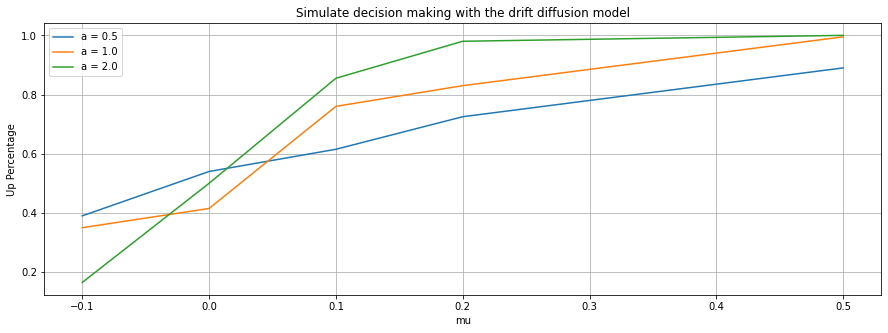

In [9]:
# YOUR CODE HERE
a = 1
no_of_trials = 200
mu_values = np.array([-0.1, 0, 0.1, 0.2, 0.5])
a_values = np.array([a/2, a, 2*a])
sigma= 0.5

plt.figure(figsize=(15,5))

x_up_percent = np.zeros((len(a_values), len(mu_values)))
for i, a in enumerate(a_values):
    x_up_percent[i] = get_x_up_percetage_for_each_a(ffunc, gfunc, x0, t, a, mu_values, sigma, no_of_trials)
    
    plt.plot(mu_values, x_up_percent[i], label=f"a = {a}")
    plt.title('Simulate decision making with the drift diffusion model')
    plt.ylabel('Up Percentage')
    plt.xlabel('mu')
    plt.grid()
    plt.legend();

#### 1.2 b) Discuss your results (2 points)
What happens to the curve if you double, what if you halve the value of $a$? Explain why that is the case in terms of the drift diffusion model.

higher number of mu greater than 0.1, higher decision boundary lead to higher number of percentage. When we have small value of a, the probability of the model to go above a even if it actually goes to different direction is higher. On the other hand, bigger value of a lower the probability thus return bigger percentage.

### 1.3 Compute the reaction times (2 points)

Use the results from the last exercise to pick a value of $\mu$ (with $\sigma$ = 0.5) for which about 70% of the trials result in an `up` response. 
Run 2000 trials and record the reaction times, i.e. the moment when the decision variable $X$ crosses one of the
two decision thresholds at $X = \pm a$ (for $a = 1$), as well as the choice, i.e. which of the boundaries was hit.

In [10]:
def choosing_mu_with_70_up(x_up_percent, mu_array):
    x_up_percent = x_up_percent.T
    for i in range(len(x_up_percent)):
        if(all(p > 0.7 for p in x_up_percent[i])):
            return mu_array[i]

In [11]:
def get_boundary_reaction_time(x_list, boundary):
    for i,x in enumerate(x_list):
        if x >= boundary:
            return 1, i
        if x <= -boundary:
            return -1, i
    return 0, i

In [12]:
def get_reaction_time_boundary_hit(ffunc, gfunc, x0, t, a, mu, sigma, no_of_trials):
    time_idx_list = []
    boundary_list = []
    trails_remaining = no_of_trials
    while(trails_remaining > 0):
        res = euler_maruyama(ffunc, gfunc, x0, t, {'mu':mu}, {'sigma': sigma})
        boundary, time_idx = get_boundary_reaction_time(res, a)
        
        if(boundary!=0) :
            time_idx_list.append(time_idx)
            boundary_list.append(boundary)
            trails_remaining -= 1 
    return np.array(time_idx_list), np.array(boundary_list)

In [13]:
# YOUR CODE HERE
mu = choosing_mu_with_70_up(x_up_percent, mu_values)
a=1
sigma = 0.5
no_of_trials = 2000
time_idx_list, boundary_list = get_reaction_time_boundary_hit(ffunc, gfunc, x0, t, a, mu, sigma, no_of_trials)


### 1.4 Study the reaction time distributions

#### 1.4 a) Plot the reaction time distributions (3 points)

Plot a histogram of the reaction times for each of the choices separately, and compare the distributions (hint: use the same axis ranges for better comparability). Calculate their individual mean reaction times and indicate them in the histograms.

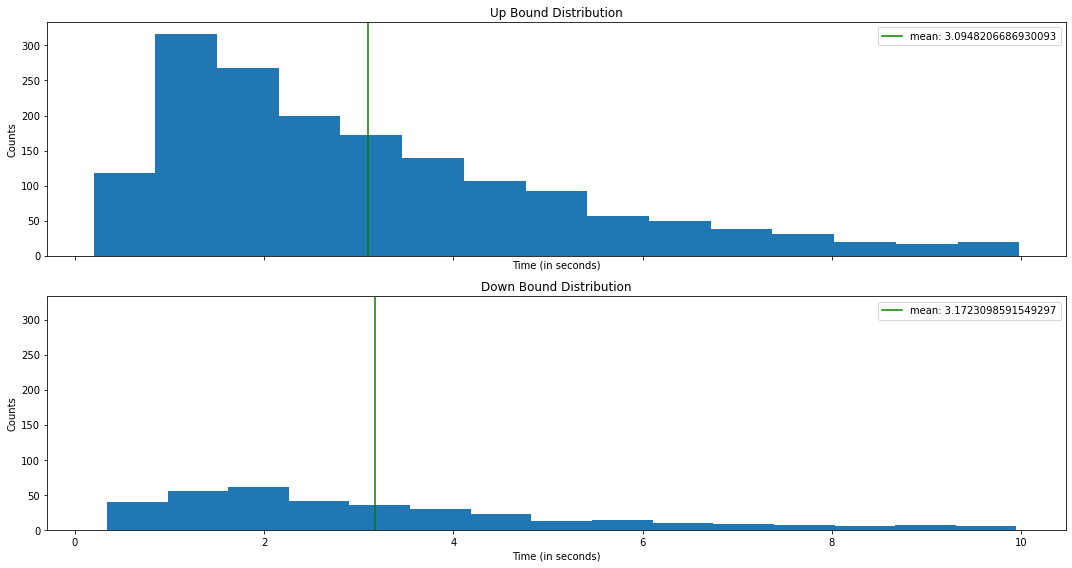

In [14]:
# YOUR CODE HERE
up_bounds = time_idx_list[boundary_list == 1]
down_bounds = time_idx_list[boundary_list == -1]

up_bounds_mean = np.mean(up_bounds)*del_t
down_bounds_mean = np.mean(down_bounds)*del_t

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 8), sharex = True, sharey=True)


axes[0].hist(up_bounds*del_t, bins = 15)
axes[0].axvline(up_bounds_mean, color = "green", label = f"mean: {up_bounds_mean}")
axes[0].set_title("Up Bound Distribution")
axes[0].set_xlabel('Time (in seconds)')
axes[0].set_ylabel('Counts')
axes[0].legend()

axes[1].hist(down_bounds*del_t, bins = 15)
axes[1].axvline(down_bounds_mean, color = "green", label = f"mean: {down_bounds_mean}")
axes[1].set_title("Down Bound Distribution")
axes[1].set_xlabel('Time (in seconds)')
axes[1].set_ylabel('Counts')
axes[1].legend()
fig.tight_layout()

#### 1.4 b) Discuss your results (2 points)

Discuss whether (and why) this is what you would have expected.

It seems that the distribution for up and down decision boundary are the same. However the count for up bound distribution is higher thatn the down bound. This was expected because the myu is positive

The mean for both distribution are similar.

### 1.5 Extend the drift diffusion model to better fit experimental data

In behavioral experiments error trials typically show longer reaction times than correct trials. 

#### 1.5 a) Implement an extended version of the drift diffusion model (3 points)

To reproduce these results, implement an extended version of the drift-diffusion model, in which the drift $\mu$ for each trial is drawn from a Gaussian distribution with mean $m_{\mu}$ and standard deviation $s_{\mu}$ . 

Find values for $m_{\mu}$ and $s_{\mu}$ that keep 70% `up` rate but have reaction time distributions that (qualitatively) fit the experimental results better.

Plot your resulting distributions and mean reaction times for `up` and `down` responses from 2000 trials.

In [15]:
ffunc = lambda x, t, **kwargs : np.random.normal(kwargs['mu'], kwargs['sigma_u'])
gfunc = lambda x, t, **kwargs : kwargs['sigma']

mus = np.linspace(0.1, 1,5).tolist()
sigmas_u = np.linspace(0.01, 1,5).tolist()

num_trials = 2000
del_t = 1e-2
x0 = [0]
t = np.arange(0, 10, del_t)
a = 1
sigma = 0.5

def get_x_up_percentages(ffunc, gfunc, x0, t, a, mu, sigma_u, sigma, no_of_trials):
    up_count = 0
    trails_remaining = no_of_trials
    while(trails_remaining > 0):
        res = euler_maruyama(ffunc, gfunc, x0, t, {'mu':mu, 'sigma_u':sigma_u}, {'sigma': sigma})
        up_count, boundary_reached = check_for_boundary(res, up_count, a)
        if(boundary_reached) :
            trails_remaining -= 1 
    return up_count/no_of_trials


percentages = []
mu_70 = []
sigma_u_70 = []

for mu in mus:
    for sigma_u in sigmas_u:
        percentage = get_x_up_percentages(ffunc, gfunc, x0, t, a, mu, sigma_u, sigma, num_trials)
        # print('mu: {}'.format(mu))
        # print('sigma: {}'.format(sigma_u))
        #print('percentage: {} \n'.format(percentage))

        if abs(percentage - 0.7) <= 0.1:
            percentages.append(percentage)
            mu_70.append(mu)
            sigma_u_70.append(sigma_u)
            print('mu: {}'.format(mu))
            print('sigma: {}'.format(sigma_u))
            print('percentage: {} \n'.format(percentage))


def get_reaction_time_boundary_hits(ffunc, gfunc, x0, t, a, mu, sigma_u, sigma, no_of_trials):
    time_idx_list = []
    boundary_list = []
    trails_remaining = no_of_trials
    while(trails_remaining > 0):
        res = euler_maruyama(ffunc, gfunc, x0, t, {'mu':mu, 'sigma_u':sigma_u}, {'sigma': sigma})
        boundary, time_idx = get_boundary_reaction_time(res, a)
        
        if(boundary!=0) :
            time_idx_list.append(time_idx)
            boundary_list.append(boundary)
            trails_remaining -= 1 
    return np.array(time_idx_list), np.array(boundary_list)



for mu in mu_70:
    for sigma_u in sigma_u_70:
            
        time_idx_list, boundary_list = get_reaction_time_boundary_hits(ffunc, gfunc, x0, t, a, mu, sigma_u, sigma, num_trials)

        #plotting
        up_bounds = time_idx_list[boundary_list == 1]
        down_bounds = time_idx_list[boundary_list == -1]

        up_bounds_mean = np.mean(up_bounds)*del_t
        down_bounds_mean = np.mean(down_bounds)*del_t

        fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 8), sharex = True)


        axes[0].hist(up_bounds*del_t, bins = 15)
        axes[0].axvline(up_bounds_mean, color = "green", label = f"mean: {up_bounds_mean}")
        axes[0].set_title("Up Bound Distribution")
        axes[0].set_xlabel('Time (in seconds)')
        axes[0].set_ylabel('Counts')
        axes[0].legend()

        axes[1].hist(down_bounds*del_t, bins = 15)
        axes[1].axvline(down_bounds_mean, color = "green", label = f"mean: {down_bounds_mean}")
        axes[1].set_title("Down Bound Distribution")
        axes[1].set_xlabel('Time (in seconds)')
        axes[1].set_ylabel('Counts')
        axes[1].legend()
        fig.tight_layout()


mu: 0.1
sigma: 0.01
percentage: 0.684 

mu: 0.1
sigma: 0.2575
percentage: 0.689 

mu: 0.1
sigma: 0.505
percentage: 0.682 

mu: 0.1
sigma: 0.7525
percentage: 0.6835 

mu: 0.1
sigma: 1.0
percentage: 0.6835 



KeyboardInterrupt: 

#### 1.5 b) Discuss your results (2 points)
Why does the extended verion of the drift-diffusion model produce this assymetry in the reaction time distributions?

the addition of stochastic term in the mean will eventually makes the reaction time stochastic too. therefore